## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 0:30** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [0]:
from google.colab import files
files.upload()

Saving datasets_228_482_diabetes.csv to datasets_228_482_diabetes.csv


{'datasets_228_482_diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,

In [0]:
data = pd.read_csv('datasets_228_482_diabetes.csv')

In [0]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [0]:
# в столбце Pregnancies нули не являются пропущенными значениями, беременностей у человека могло не быть на момент исследования.

In [0]:
data[data['Glucose'] == 0]
# концентрация глюкозы в плазме не модет быть нулевой.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [0]:
data.loc[data['Glucose'] == 0, 'Glucose'] = data['Glucose'].mean()

In [0]:
data['BloodPressure'].value_counts()
# нули - признак пропущенных значений, т.к. давление не может быть нулевым у живого человека.

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

In [0]:
data.loc[data['BloodPressure'] == 0, 'BloodPressure'] = data['BloodPressure'].mean()

In [0]:
data['SkinThickness'].value_counts()
# толщина кожи больше нуля. 0 - признак отсутствующих значений.

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [0]:
data.loc[data['SkinThickness'] == 0, 'SkinThickness'] = data['SkinThickness'].mean()

In [0]:
data['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [0]:
data.loc[data['Insulin'] == 0, 'Insulin'] = data['Insulin'].mean()

In [0]:
data[data['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,20.536458,79.799479,0.0,0.232,54,1
49,7,105.0,69.105469,20.536458,79.799479,0.0,0.305,24,0
60,2,84.0,69.105469,20.536458,79.799479,0.0,0.304,21,0
81,2,74.0,69.105469,20.536458,79.799479,0.0,0.102,22,0
145,0,102.0,75.000000,23.000000,79.799479,0.0,0.572,21,0
371,0,118.0,64.000000,23.000000,89.000000,0.0,1.731,21,0
426,0,94.0,69.105469,20.536458,79.799479,0.0,0.256,25,0
494,3,80.0,69.105469,20.536458,79.799479,0.0,0.174,22,0
522,6,114.0,69.105469,20.536458,79.799479,0.0,0.189,26,0
684,5,136.0,82.000000,20.536458,79.799479,0.0,0.640,69,0


In [0]:
data.loc[data['BMI'] == 0, 'BMI'] = data['BMI'].mean()

In [0]:
data[data['DiabetesPedigreeFunction'] == 0]
# нулей нет

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [0]:
data['Age'].value_counts()
# нулей нет

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

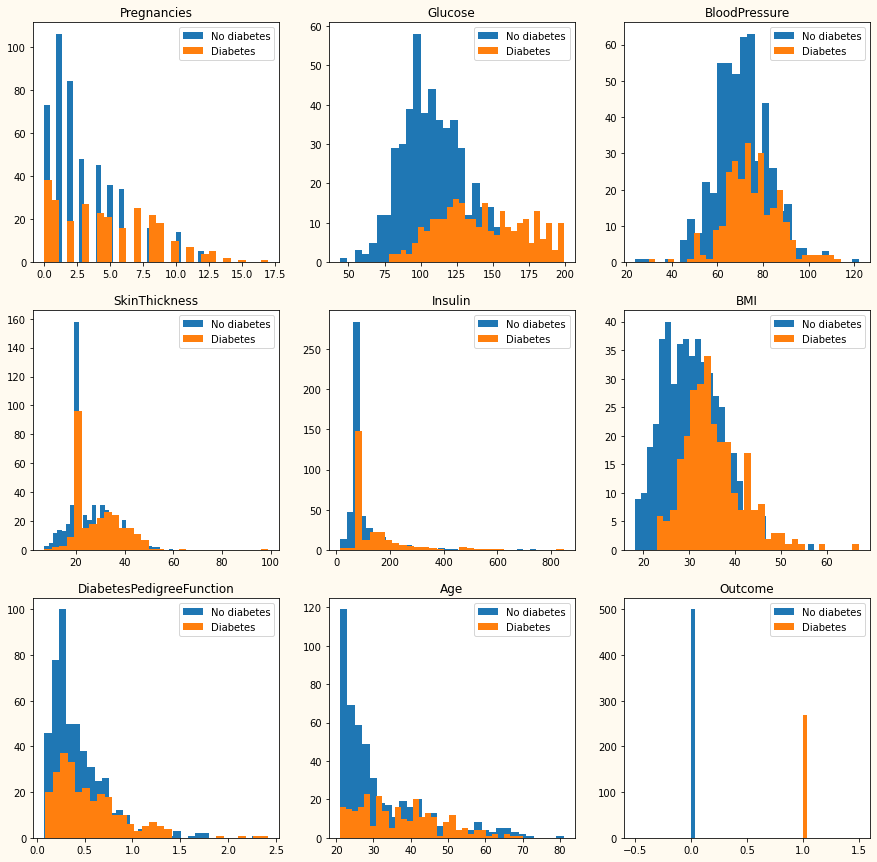

In [0]:
fig, ax = plt.subplots(3, 3)
col = np.array(data.columns).reshape(3, 3)
for i in range(len(col)):
  for j in range(len(col[i])):
    data[data['Outcome'] == 0][col[i][j]]
    ax[i, j].hist(data[data['Outcome'] == 0][col[i][j]], label='No diabetes', bins=30)
    ax[i, j].hist(data[data['Outcome'] == 1][col[i][j]], label='Diabetes', bins=30)
    ax[i, j].legend()
    ax[i, j].set_title(col[i][j])


fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(15)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

In [0]:
# Признаков Pregnancies, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction характер распределения совпадает для больных диабетом и здоровых (здоровых людей больше).
# У признака BMI пик распределения для больных смещен правее относительно распределения для здоровых людей, у признака Age распределение практически однинаково для больных 
# и здоровых старше 30 лет, однако для людей младше 30 лет распределение для больных не имеет пика, в отличие от ярко выраженного пика в распределении для здоровых. Самые 
# значительные отличия наблюдаются в распределениях признака Glucose: разный характер, пик значительно смещен вправо. Таким образом, можно предполагать, что наибольшую важность 
# для анализа представляют признаки Age, BMI, Glucose.

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [0]:
target = data['Outcome']

In [0]:
data[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [0]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [0]:
del data['Outcome']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.to_numpy().astype(np.float64), target.to_numpy(), test_size=0.3, random_state=42)

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(X_train, y_train)

In [0]:
result = clf.predict(X_test)

In [0]:
def show_metrics(base, prediction):
  print('accuracy:', accuracy_score(base, prediction))
  print('precision:', precision_score(base, prediction, average='micro'))
  print('recall:', recall_score(base, prediction, average='micro'))

In [0]:
show_metrics(y_test, result)

accuracy: 0.7445887445887446
precision: 0.7445887445887446
recall: 0.7445887445887446


In [0]:
roc_auc_score(y_test, result)

0.737044701986755

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)

In [0]:
result_rf = clf_rf.predict(X_test)

In [0]:
show_metrics(y_test, result_rf)

accuracy: 0.7575757575757576
precision: 0.7575757575757576
recall: 0.7575757575757576


**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

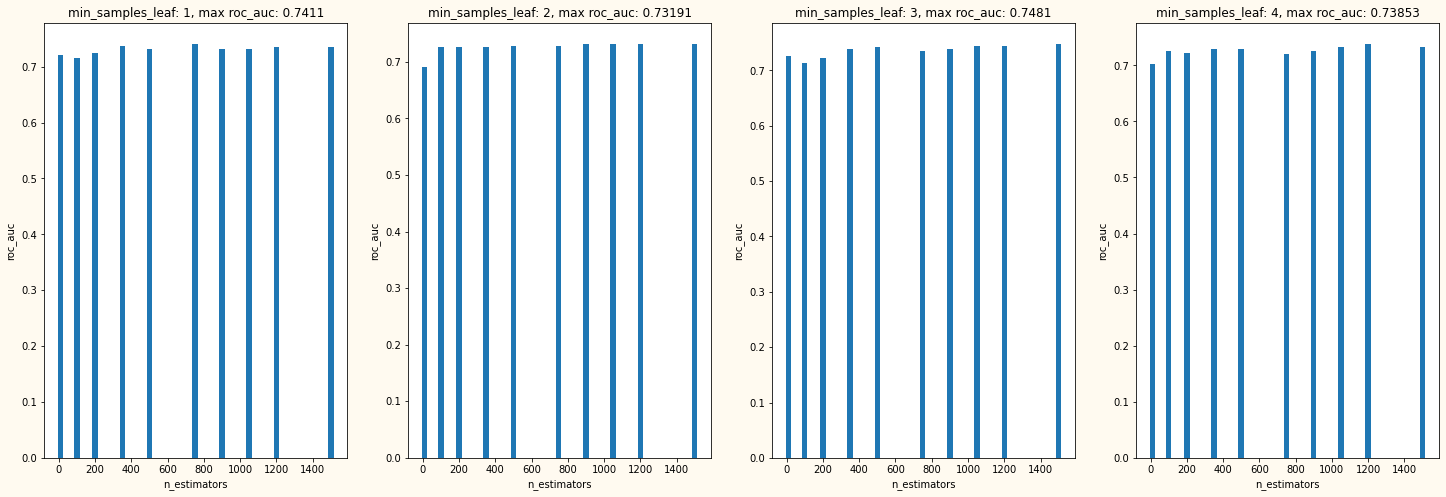

In [0]:
from sklearn.metrics import roc_auc_score

min_samples_leaf = [1, 2, 3, 4]
n_estimators = [10, 100, 200, 350, 500, 750, 900, 1050, 1200, 1500]
roc_auc_on_est_num = []

fig, axes = plt.subplots(1, 4)
fig.set_facecolor('floralwhite')
fig.set_figwidth(25)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure

for j in range(len(min_samples_leaf)):
  for i in n_estimators:
    clf_rf = RandomForestClassifier(n_estimators=i, min_samples_leaf=min_samples_leaf[j], random_state=0).fit(X_train, y_train)
    roc_auc_on_est_num.append(roc_auc_score(y_test, clf_rf.predict(X_test), multi_class='ovr'))
  axes[j].bar(n_estimators, roc_auc_on_est_num, width=30)
  axes[j].set_title('min_samples_leaf: ' + str(min_samples_leaf[j]) + ', max roc_auc: ' + str(round(max(roc_auc_on_est_num), 5)))
  axes[j].set_xlabel('n_estimators')
  axes[j].set_ylabel('roc_auc')
  roc_auc_on_est_num = []

In [0]:
# Для всех наборов значение ROC_AUC примерно совпадает и колеблется в диапазоне 0.74+-0.009. Для малого количества деревьев значение везде ниже и после 350 остается почти постоянным.
# Лучше всего алгоритм показал себя при 1 и 3 объектах в листе, хуже всего при 2 объектах. В итоге получилось, что наибольшее значение ROC_AUC из вычисленных достигается при 
# количестве деревьев 1500 и минимум 3 объектах в листе.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

In [0]:
clf_rf = RandomForestClassifier(n_estimators=1500, min_samples_leaf=3, random_state=0).fit(X_train, y_train)

In [0]:
clf_rf.feature_importances_

array([0.06797463, 0.30813268, 0.0707161 , 0.06018676, 0.07177444,
       0.17225522, 0.09677291, 0.15218727])

<BarContainer object of 8 artists>

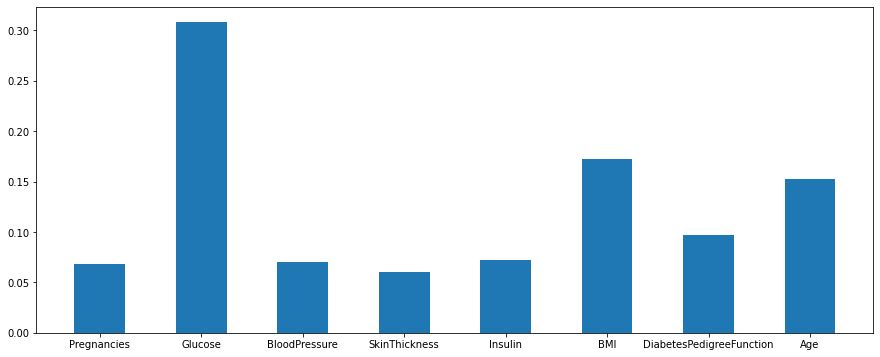

In [0]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.bar(data.columns, clf_rf.feature_importances_, width=0.5)

In [0]:
# предположение, основанное на наблюдениях за графиками, подтвердилось - наибольшую важность представляют признаки Glucose, а также BMI и Age 

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [0]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

max_iter = [30, 50, 100, 500, 1000, 1500]
for i in max_iter:
  hgbc = HistGradientBoostingClassifier(max_iter=i).fit(X_train, y_train)
  res = hgbc.predict(X_test)
  print('Trees number:', i)
  show_metrics(y_test, res)
  print('roc_auc:', roc_auc_score(y_test, res))

Trees number: 30
accuracy: 0.7619047619047619
precision: 0.7619047619047619
recall: 0.7619047619047619
roc_auc: 0.7502897350993377
Trees number: 50
accuracy: 0.7575757575757576
precision: 0.7575757575757576
recall: 0.7575757575757576
roc_auc: 0.7469784768211921
Trees number: 100
accuracy: 0.7489177489177489
precision: 0.7489177489177489
recall: 0.7489177489177489
roc_auc: 0.734478476821192
Trees number: 500
accuracy: 0.7272727272727273
precision: 0.7272727272727273
recall: 0.7272727272727273
roc_auc: 0.7149834437086092
Trees number: 1000
accuracy: 0.7229437229437229
precision: 0.7229437229437229
recall: 0.7229437229437229
roc_auc: 0.7116721854304636
Trees number: 1500
accuracy: 0.7229437229437229
precision: 0.7229437229437229
recall: 0.7229437229437229
roc_auc: 0.7116721854304636


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [140, 150, 160, 300, 1000, 1500]
for i in n_estimators:
  gbc = GradientBoostingClassifier(n_estimators=i).fit(X_train, y_train)
  res = gbc.predict(X_test)
  print('Trees number:', i)
  show_metrics(y_test, res)
  print('roc_auc:', roc_auc_score(y_test, res))

Trees number: 140
accuracy: 0.7445887445887446
precision: 0.7445887445887446
recall: 0.7445887445887446
roc_auc: 0.7252897350993377
Trees number: 150
accuracy: 0.7445887445887446
precision: 0.7445887445887446
recall: 0.7445887445887446
roc_auc: 0.7341059602649007
Trees number: 160
accuracy: 0.7272727272727273
precision: 0.7272727272727273
recall: 0.7272727272727273
roc_auc: 0.712044701986755
Trees number: 300
accuracy: 0.7272727272727273
precision: 0.7272727272727273
recall: 0.7272727272727273
roc_auc: 0.7061672185430463
Trees number: 1000
accuracy: 0.7186147186147186
precision: 0.7186147186147186
recall: 0.7186147186147186
roc_auc: 0.7054221854304636
Trees number: 1500
accuracy: 0.7056277056277056
precision: 0.7056277056277056
recall: 0.7056277056277056
roc_auc: 0.6984271523178809


In [0]:
# Оба классификатора основаны на алгоритме градиентного бустинга. HistGradientBoostingClassifier (histogram-based) дополнительно обрабатывает объекты с пропущенными значениями, 
# помещая их в левое или правое поддерево в зависимости от потенциального выигрыша, либо передавая в сторону большего количества объектов в потомке. Этот алгоритм 
# работает быстрее для большого количества объектов в выборке, однако в данном случае это не дает преимущества (объектов меньше 1000). Наилучшие результаты GB 
# показывает при 150 деревьях, а HGB при 30. Поэтому по результатам перебора, лучший выбор - HGB. 

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [0]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [0]:
base_learners = [('hgbc', HistGradientBoostingClassifier(max_iter=1500, random_state=0)),
                 ('svc', make_pipeline(StandardScaler(), LinearSVC(max_iter=45, random_state=0)))]

stack_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=50))

In [0]:
stack_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

StackingClassifier(cv=None,
                   estimators=[('hgbc',
                                HistGradientBoostingClassifier(l2_regularization=0.0,
                                                               learning_rate=0.1,
                                                               loss='auto',
                                                               max_bins=255,
                                                               max_depth=None,
                                                               max_iter=1500,
                                                               max_leaf_nodes=31,
                                                               min_samples_leaf=20,
                                                               n_iter_no_change=None,
                                                               random_state=0,
                                                               scoring=None,
                                              

In [0]:
stack_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [0]:
roc_auc_score(y_test, stack_clf.predict(X_test)) # ROC_AUC ниже чем у всех предыдущих алгоритмов

0.720157284768212

In [0]:
show_metrics(y_test, stack_clf.predict(X_test)) # метрики качества лучше чем у BaggingClassifier

accuracy: 0.7532467532467533
precision: 0.7532467532467533
recall: 0.7532467532467533


In [0]:
base_learners = [('rfc', RandomForestClassifier(n_estimators=1500, min_samples_leaf=3, random_state=0)),
                 ('svc', make_pipeline(StandardScaler(), LinearSVC(max_iter=45, random_state=0)))]

stack_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=50))

In [0]:
stack_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

StackingClassifier(cv=None,
                   estimators=[('rfc',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=3,
                                                       min_samples_split=2,
                                    

In [0]:
roc_auc_score(y_test, stack_clf.predict(X_test)) # ниже чем у всех предыдущих алгоритмов, в том числе StackingClassifier с HGB

0.7135347682119205

In [0]:
show_metrics(y_test, stack_clf.predict(X_test)) # метрики совпадают с BaggingClassifier

accuracy: 0.7445887445887446
precision: 0.7445887445887446
recall: 0.7445887445887446


In [0]:
# в целом, HGB все равно показал себя лучше

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>